# Versión 1 - Tensorflow

In [1]:
#Importando Librerías
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importando data csv
data = pd.read_csv('./all-data.csv', names=['Label', 'Text'], encoding='latin-1')
data2=data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4846 non-null   object
 1   Text    4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [4]:
data.head(10)

,Label,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,positive,"For the last quarter of 2010 , Componenta 's n..."
7,positive,"In the third quarter of 2010 , net sales incre..."
8,positive,Operating profit rose to EUR 13.1 mn from EUR ...
9,positive,"Operating profit totalled EUR 21.1 mn , up fro..."


C:\Users\Gary\anaconda3\envs\py_galileo_2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


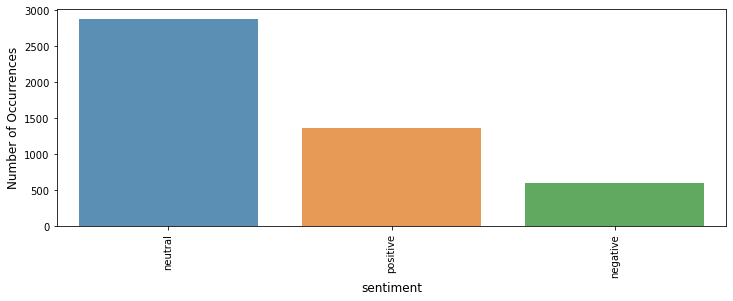

In [5]:
cnt_pro = data['Label'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();



In [6]:
#Preprocesamiento
def busca_secuencias(textos):
    tokenizer = Tokenizer() #vectorizando los textos a utilizar
    tokenizer.fit_on_texts(textos)
    secuencias = tokenizer.texts_to_sequences(textos)
#    print("Vocab length:", len(tokenizer.word_index) + 1)
    max_seq_length = np.max(list(map(lambda x: len(x), secuencias)))
#    print("Maximum sequence length:", max_seq_length)
    secuencias = pad_sequences(secuencias, maxlen=max_seq_length, padding='post')
    return secuencias

In [7]:
def preprocess_inputs(df):
    df = df.copy()
    
    secuencias = busca_secuencias(df['Text'])
    
    label_mapping = {
        'negative': 0,
        'neutral': 1,
        'positive': 2
    }
    
    y = df['Label'].replace(label_mapping)
    
    train_sequences, test_sequences, y_train, y_test = train_test_split(secuencias, y, train_size=0.9, shuffle=True, random_state=1)
    
    return train_sequences, test_sequences, y_train, y_test

In [8]:
train_sequences, test_sequences, y_train, y_test = preprocess_inputs(data)

In [17]:
inputs = tf.keras.Input(shape=(train_sequences.shape[1],))
x = tf.keras.layers.Embedding(
    input_dim=10123,
    output_dim=128,
    input_length=train_sequences.shape[1]
    )(inputs)
x = tf.keras.layers.GRU(256, return_sequences=True, activation='tanh')(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(60, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

#Prueba1
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




In [11]:
#Adam - train size 0.9
history = model.fit(train_sequences,y_train,validation_split=0.1,batch_size=4,epochs=50,callbacks=[
            tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=8,
            restore_best_weights=True)])

Epoch 1/50
981/981 [==============================] - 81s 83ms/step - loss: 0.7633 - accuracy: 0.6832 - val_loss: 0.7355 - val_accuracy: 0.6979
Epoch 2/50
981/981 [==============================] - 83s 85ms/step - loss: 0.2854 - accuracy: 0.8879 - val_loss: 0.8854 - val_accuracy: 0.6979
Epoch 3/50
981/981 [==============================] - 89s 90ms/step - loss: 0.0834 - accuracy: 0.9743 - val_loss: 1.0783 - val_accuracy: 0.6934
Epoch 4/50
981/981 [==============================] - 81s 83ms/step - loss: 0.0445 - accuracy: 0.9896 - val_loss: 1.2248 - val_accuracy: 0.7346
Epoch 5/50
981/981 [==============================] - 94s 96ms/step - loss: 0.0260 - accuracy: 0.9952 - val_loss: 1.3187 - val_accuracy: 0.7185
Epoch 6/50
981/981 [==============================] - 86s 88ms/step - loss: 0.0267 - accuracy: 0.9944 - val_loss: 1.4705 - val_accuracy: 0.7048
Epoch 7/50
981/981 [==============================] - 80s 82ms/step - loss: 0.0371 - accuracy: 0.9931 - val_loss: 1.8969 - val_accuracy:

In [15]:
#Nadam
history2 = model.fit(train_sequences,y_train,validation_split=0.1,batch_size=16,epochs=100,callbacks=[
            tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=4,
            restore_best_weights=True)])

Epoch 1/100
246/246 [==============================] - 31s 128ms/step - loss: 0.8542 - accuracy: 0.6509 - val_loss: 0.8492 - val_accuracy: 0.6110
Epoch 2/100
246/246 [==============================] - 33s 134ms/step - loss: 0.4473 - accuracy: 0.8285 - val_loss: 0.6806 - val_accuracy: 0.7254
Epoch 3/100
246/246 [==============================] - 34s 137ms/step - loss: 0.1695 - accuracy: 0.9414 - val_loss: 0.8589 - val_accuracy: 0.7368
Epoch 4/100
246/246 [==============================] - 33s 133ms/step - loss: 0.0715 - accuracy: 0.9809 - val_loss: 1.0673 - val_accuracy: 0.7323
Epoch 5/100
246/246 [==============================] - 35s 141ms/step - loss: 0.0324 - accuracy: 0.9911 - val_loss: 1.2339 - val_accuracy: 0.7346
Epoch 6/100
246/246 [==============================] - 36s 145ms/step - loss: 0.0195 - accuracy: 0.9957 - val_loss: 1.1528 - val_accuracy: 0.7231


In [18]:
#SDG
history3 = model.fit(train_sequences,y_train,validation_split=0.1,batch_size=8,epochs=100,callbacks=[
            tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=4,
            restore_best_weights=True)])

Epoch 1/100
491/491 [==============================] - 42s 85ms/step - loss: 1.0935 - accuracy: 0.5754 - val_loss: 1.0091 - val_accuracy: 0.4874
Epoch 2/100
491/491 [==============================] - 47s 96ms/step - loss: 0.9459 - accuracy: 0.5780 - val_loss: 0.9446 - val_accuracy: 0.5789
Epoch 3/100
491/491 [==============================] - 44s 90ms/step - loss: 0.9332 - accuracy: 0.5872 - val_loss: 1.1116 - val_accuracy: 0.3089
Epoch 4/100
491/491 [==============================] - 43s 87ms/step - loss: 0.9265 - accuracy: 0.5930 - val_loss: 0.9380 - val_accuracy: 0.5789
Epoch 5/100
491/491 [==============================] - 41s 84ms/step - loss: 0.9188 - accuracy: 0.5917 - val_loss: 0.9320 - val_accuracy: 0.5789
Epoch 6/100
491/491 [==============================] - 39s 80ms/step - loss: 0.9155 - accuracy: 0.5968 - val_loss: 0.9265 - val_accuracy: 0.5812
Epoch 7/100
491/491 [==============================] - 39s 79ms/step - loss: 0.9027 - accuracy: 0.6014 - val_loss: 0.9184 - val_ac

In [19]:
results = model.evaluate(test_sequences, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.85142
Test Accuracy: 63.71%


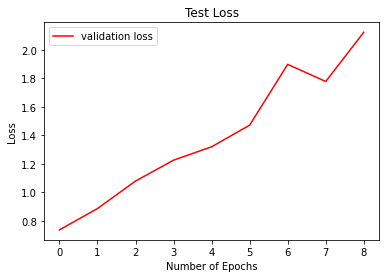

In [20]:
plt.plot(history.history['val_loss'], color = 'r', label = "validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

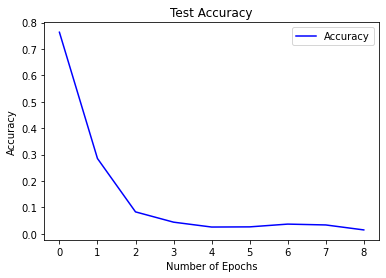

In [21]:
plt.plot(history.history['loss'], color = 'b', label = "Accuracy")
plt.title("Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

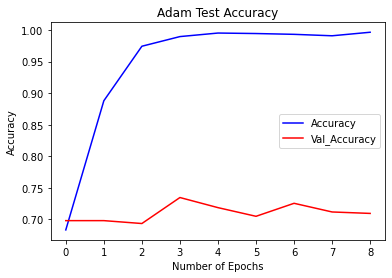

In [59]:
plt.plot(history.history['accuracy'], color = 'b', label = "Accuracy")
plt.plot(history.history['val_accuracy'], color = 'r', label = "Val_Accuracy")
plt.title("Adam Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

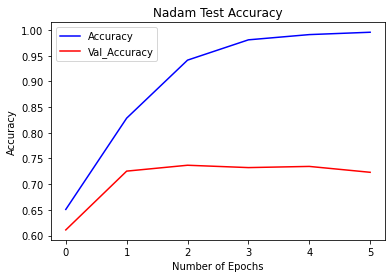

In [54]:
plt.plot(history2.history['accuracy'], color = 'b', label = "Accuracy")
plt.plot(history2.history['val_accuracy'], color = 'r', label = "Val_Accuracy")
plt.title("Nadam Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

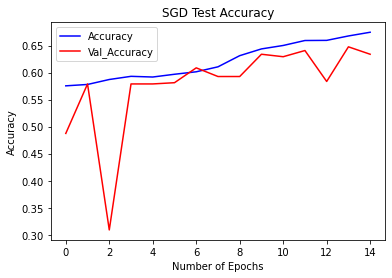

In [55]:
plt.plot(history3.history['accuracy'], color = 'b', label = "Accuracy")
plt.plot(history3.history['val_accuracy'], color = 'r', label = "Val_Accuracy")
plt.title("SGD Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Version 2 - Keras

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [26]:
#Quitamos el label Neutral para mejorar el accuracy de la versión anterior.
data2 = data2[['Label','Text']]
data2 = data2[data2.Label != "neutral"]
data2['Text'] = data2['Text'].apply(lambda x: x.lower())
data2['Text'] = data2['Text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))


In [27]:
print(data2[ data2['Label'] == 'positive'].size)
print(data2[ data2['Label'] == 'negative'].size)

2726
1208


In [28]:
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data2['Text'].values)
X = tokenizer.texts_to_sequences(data2['Text'].values)
X = pad_sequences(X)

In [29]:
embed_dim = 10123
lstm_out = 128

model2 = Sequential()
model2.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model2.add(SpatialDropout1D(0.4))
model2.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(2,activation='softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 46, 10123)         20246000  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 46, 10123)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               5249024   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 258       
Total params: 25,495,282
Trainable params: 25,495,282
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
Y = pd.get_dummies(data2['Label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1573, 46) (1573, 2)
(394, 46) (394, 2)


In [ ]:
#Y_train = to_categorical(Y_train, 3)
#Y_test = to_categorical(Y_test, 3)

In [56]:
batch_size = 16
history5 = model2.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2,validation_data=(X_test, Y_test))

Epoch 1/10
99/99 - 215s - loss: 0.0063 - accuracy: 0.9994 - val_loss: 0.9532 - val_accuracy: 0.8249
Epoch 2/10
99/99 - 219s - loss: 0.0044 - accuracy: 0.9981 - val_loss: 1.0094 - val_accuracy: 0.8477
Epoch 3/10
99/99 - 215s - loss: 6.5546e-04 - accuracy: 1.0000 - val_loss: 1.0482 - val_accuracy: 0.8477
Epoch 4/10
99/99 - 215s - loss: 3.1524e-04 - accuracy: 1.0000 - val_loss: 1.0837 - val_accuracy: 0.8477
Epoch 5/10
99/99 - 216s - loss: 2.3716e-04 - accuracy: 1.0000 - val_loss: 1.1118 - val_accuracy: 0.8452
Epoch 6/10
99/99 - 216s - loss: 1.6927e-04 - accuracy: 1.0000 - val_loss: 1.1333 - val_accuracy: 0.8452
Epoch 7/10
99/99 - 216s - loss: 1.4380e-04 - accuracy: 1.0000 - val_loss: 1.1538 - val_accuracy: 0.8452
Epoch 8/10
99/99 - 215s - loss: 1.1656e-04 - accuracy: 1.0000 - val_loss: 1.1720 - val_accuracy: 0.8452
Epoch 9/10
99/99 - 215s - loss: 1.0061e-04 - accuracy: 1.0000 - val_loss: 1.1885 - val_accuracy: 0.8452
Epoch 10/10
99/99 - 218s - loss: 8.3937e-05 - accuracy: 1.0000 - val_los

In [32]:
results2 = model2.evaluate(X_test, Y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results2[0]))
print("Test Accuracy: {:.2f}%".format(results2[1] * 100))

    Test Loss: 1.03428
Test Accuracy: 83.25%


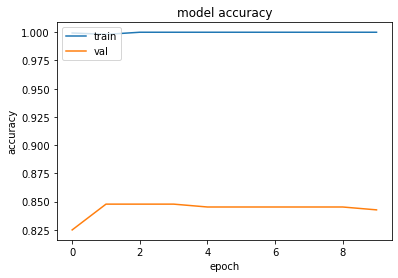

In [57]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

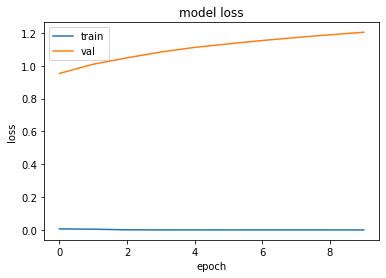

In [58]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()